In [6]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("./data/sample_26000_full_cleansed_anonymized.csv")
df

,event_time,user_uuid,devicegroup,device,ip_address,os_family,os_name,browser_name,locode,postal_code
0,1534262899,c7f3d022e57d46ec78d1626a016ecb9281fbe2b2,PC,Other$Other,4523dfed2d55afbd76286861e0b764e08d4695f7,Windows,10,Firefox,DE-BY-POS,92353
1,1534265100,b602d594afd2b0b327e07a06f36ca6a7e42546d0,PC,Other$Other,313f8be041b0a4b47127bdc099ffcb9fbe40aca9,Windows,7,Chrome,DE-ST-MAG,39126
2,1534265100,7ea941558d60dd9025cf9ff65cc4b07a1e586f21,ConnectedTV,Samsung$Other,8169f04e199ced559079f5612b2bd91304bc3e73,Other,Other,Other,DE-NW-GEB,58285
3,1534265100,169b447c8b60727820f9b7a3755994e123b2a7c5,Phone,HTC$Other,7535415dde140793e63637086572c4e2d36ba6e5,Android,6,Chrome,DE-NI-DUD,37115
4,1534265100,169b447c8b60727820f9b7a3755994e123b2a7c5,Phone,HTC$Other,7535415dde140793e63637086572c4e2d36ba6e5,Android,6,Chrome,DE-NI-DUD,37115
...,...,...,...,...,...,...,...,...,...,...
26259,1534265999,1aca6233d13bb9e23b0b3b292653eb8bff7486a7,PC,Other$Other,1b34be77c8470ddbb705ca38a43ba4c32e46ef18,Windows,8,Firefox,DE-SN-LEJ,4209
26260,1534265999,1aca6233d13bb9e23b0b3b292653eb8bff7486a7,PC,Other$Other,1b34be77c8470ddbb705ca38a43ba4c32e46ef18,Windows,8,Firefox,DE-SN-LEJ,4209
26261,1534265999,1aca6233d13bb9e23b0b3b292653eb8bff7486a7,PC,Other$Other,1b34be77c8470ddbb705ca38a43ba4c32e46ef18,Windows,8,Firefox,DE-SN-LEJ,4209
26262,1534265999,75e01f11cd4650d8e2221663b18260451e4de6ef,Phone,Samsung$Galaxy,08269cdd472d182bee91485bb998f1618080c9f5,Android,4,Chrome,DE-BE-BER,14193


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26264 entries, 0 to 26263
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   event_time    26264 non-null  int64 
 1   user_uuid     26264 non-null  object
 2   devicegroup   26264 non-null  object
 3   device        26264 non-null  object
 4   ip_address    26264 non-null  object
 5   os_family     26264 non-null  object
 6   os_name       26264 non-null  object
 7   browser_name  26264 non-null  object
 8   locode        26264 non-null  object
 9   postal_code   25136 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.0+ MB


In [5]:
df.describe()

,event_time
count,2.626400e+04
mean,1.534265e+09
std,4.719512e+02
min,1.534263e+09
25%,1.534265e+09
50%,1.534265e+09
75%,1.534266e+09
max,1.534266e+09


# Duplicates check

In [105]:
df = df.drop_duplicates()

# Missing data check

In [106]:
missing_dict = dict()

# summarize the number of rows with missing values for each column
for column in df.columns:
    # count number of rows with missing values
    n_miss = df[column].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    # append to dict
    missing_dict[column] = [n_miss, perc.round()]

missing_df = pd.DataFrame(missing_dict.values(),
                          index=missing_dict.keys(),
                          columns=['N_Missing [-]', 'Percentage [%]'])
missing_df

,N_Missing [-],Percentage [%]
event_time,0,0.0
user_uuid,0,0.0
devicegroup,0,0.0
device,0,0.0
ip_address,0,0.0
os_family,0,0.0
os_name,0,0.0
browser_name,0,0.0
locode,0,0.0
postal_code,724,5.0


# Inspect the columns

#### Event Time

<AxesSubplot: xlabel='event_time', ylabel='Count'>

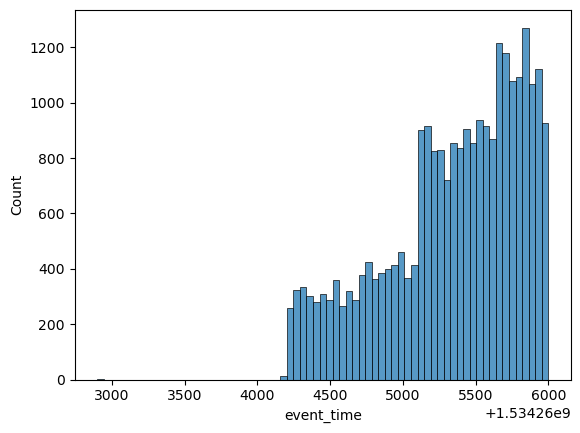

In [11]:
sns.histplot(df.event_time)

#### User UU ID

In [29]:
df.user_uuid.value_counts()

b602d594afd2b0b327e07a06f36ca6a7e42546d0    5873
ea48b29e05da74493d397da3ac7533708e8790fd     147
174040068c20ff3e16f0f6a16dd36371f2a87d1d      37
c6d50ae60dec32654cab6adf015b84b54c31782b      11
caa1a9df787b355c0af05bce1d888cabaae390fa      11
                                            ... 
fd3e60d636504c665a18fb084374fed5337e51b9       1
145e767be08fe73f96decc5cd41fe2f220b72169       1
3ae34daec327bf90840b2ca5ea8d6ee0a3817629       1
953ce11643d5aa4f38cc15bbbe3cfb178cd0d530       1
7744d4b79adb3869645429e6047a9810ad19fdcb       1
Name: user_uuid, Length: 11110, dtype: int64

#### Device group

In [19]:
df.devicegroup.value_counts()

PC                 12281
Phone               7526
ConnectedTV         4755
Tablet              1612
ConnectedDevice       70
SetTopBox             20
Name: devicegroup, dtype: int64

#### Device

In [35]:
df.device.value_counts()

Other$Other         12363
Samsung$Other        4860
Apple$iPhone         2106
Apple$Other          2054
Apple$iPad           1535
Panasonic$Other       746
LG$Other              610
Sony$Other            493
Philips$Other         286
Huawei$Other          261
Telefunken$Other      145
Samsung$Galaxy        131
Motorola$Moto          85
HTC$Other              74
Amazon$Kindle          69
Technisat$Other        68
Lenovo$Other           67
Loewe$Other            59
Aldi$Other             56
Toshiba$Other          47
ZTE$Other              37
Hisense$Other          36
Microsoft$Xbox         17
Other$Nexus            16
Vodafone$Other          8
Asus$Other              6
Microsoft$Lumia         6
RIM$Other               5
JVC$Other               5
Nokia$Other             3
Kendo$Other             3
Nokia$Lumia             2
Sony$PlayStation        2
HP$Other                1
Apple$iPod              1
Nintendo$Wii            1
Name: device, dtype: int64

#### IP Address

In [36]:
df.ip_address.value_counts()

bf96134a2a35c14daf084af58efebb0f09854ebb    16
03ff27505d24ea9eec66dc0b9127f3f1b26e968f    15
1786d49f32887b21b118af973994e0a78e238669    15
e897fcc02df496db4a033ce1b792d631dc9f9ef7    12
ab20bb4a790f5ef32181e3abaa6ef565b905ea85    12
                                            ..
f1e6014004aa739d406b6c68f12ea30431bc42bd     1
91d8f420784369e50696c60ce74536c1d5a5941c     1
6c718ce9b63ea9bdf6e8455a0a700e5feec9a807     1
52359171c9214713202c2b1d6420f1cbf036d132     1
285d0ec1652362aa6148557be3c9e3c6cb6cbd0a     1
Name: ip_address, Length: 14468, dtype: int64

#### OS Family

In [37]:
df.os_family.value_counts()

Windows     9939
Android     5543
iOS         3649
Other       2877
macOS       2047
Linux       1990
WebOS        211
ChromeOs       8
Name: os_family, dtype: int64

#### OS name

In [38]:
df.os_name.value_counts()

10           6524
Other        5617
7            4270
8            3069
11           2853
10.13        1065
5             795
6             767
10.11         380
10.12         313
4             235
10.10         187
9             160
12             11
10.14           8
10 Mobile       5
Phone 8         5
Name: os_name, dtype: int64

#### Browser name

In [39]:
df.browser_name.value_counts()

Chrome     9575
Firefox    4889
Safari     4859
Other      3491
Opera      1564
Edge       1281
MSIE        587
Vivaldi      18
Name: browser_name, dtype: int64

#### Locode

In [40]:
df.locode.value_counts()

DE-BE-BER    1559
DE-HH-HAM    1211
DE-BY-MUC     819
DE-NW-CGN     657
DE--          591
             ... 
DE-HE-BEB       1
IT-PD-CAP       1
DE-BY-UFF       1
IT-SP-SPE       1
US-MD-S6K       1
Name: locode, Length: 2622, dtype: int64

#### Postal code

In [42]:
df.postal_code.value_counts()

12529    569
20095    497
70173    254
80796    182
1040     139
        ... 
33054      1
94333      1
77767      1
92681      1
7973       1
Name: postal_code, Length: 3969, dtype: int64

#### Rows with missing postal code

In [61]:
missing_code = df[df.postal_code.isnull()]
missing_code

,event_time,user_uuid,devicegroup,device,ip_address,os_family,os_name,browser_name,locode,postal_code
23,1534265103,b602d594afd2b0b327e07a06f36ca6a7e42546d0,PC,Other$Other,64d10fd5d36b336586d59cb160577c379194c30d,Windows,7,Firefox,AT--,NaN
24,1534265103,b602d594afd2b0b327e07a06f36ca6a7e42546d0,PC,Other$Other,64d10fd5d36b336586d59cb160577c379194c30d,Windows,7,Firefox,AT--,NaN
25,1534265103,b602d594afd2b0b327e07a06f36ca6a7e42546d0,PC,Other$Other,64d10fd5d36b336586d59cb160577c379194c30d,Windows,7,Firefox,AT--,NaN
26,1534265103,b602d594afd2b0b327e07a06f36ca6a7e42546d0,PC,Other$Other,64d10fd5d36b336586d59cb160577c379194c30d,Windows,7,Firefox,AT--,NaN
73,1534265109,4f13fed759e09ff6ce7705744f44977521f9c3a6,Phone,Samsung$Other,1784750dacc0d1f93dc7e03e6281ef60d7cd139b,Android,8,Chrome,AL--,NaN
...,...,...,...,...,...,...,...,...,...,...
26220,1534265992,b602d594afd2b0b327e07a06f36ca6a7e42546d0,Tablet,Apple$iPad,739206b4ab9a7ff6dfd679d132f87c691e34d2c7,iOS,11,Safari,DE--,NaN
26227,1534265993,cde1e6a3029e5d87da50b990525be601c50b5c7e,PC,Apple$Other,a0b3f23faa1b7859ade63cb4ec3a089c42b08d90,macOS,10.13,Chrome,AT--,NaN
26228,1534265993,cde1e6a3029e5d87da50b990525be601c50b5c7e,PC,Apple$Other,a0b3f23faa1b7859ade63cb4ec3a089c42b08d90,macOS,10.13,Chrome,AT--,NaN
26229,1534265993,cde1e6a3029e5d87da50b990525be601c50b5c7e,PC,Apple$Other,a0b3f23faa1b7859ade63cb4ec3a089c42b08d90,macOS,10.13,Chrome,AT--,NaN


# The same devices search
Two devices are considered "in the same household" if their user_uuid are different (two separate devices) but their ip address 
overlap at some point (both devices used behind same router).

In [74]:
grp = df.groupby('ip_address')

#### The same household devices

In [94]:
grp.size().sort_values(ascending=False)

ip_address
bf96134a2a35c14daf084af58efebb0f09854ebb    16
03ff27505d24ea9eec66dc0b9127f3f1b26e968f    15
1786d49f32887b21b118af973994e0a78e238669    15
fc99c01c4f4895c902698ff012b14563c9837c30    12
ab20bb4a790f5ef32181e3abaa6ef565b905ea85    12
                                            ..
6721b3813e2f72804eeff6dc1ce92c2852173ead     1
672313f65ad79308e56a8bf44dd7f0988e91c792     1
67235bb42fad63cb01fd4c87fb3ca4050b1a8d1b     1
67268e6c50d4b7c24e5f959210f8c60138eb9c44     1
ffeaaf7e3615453ff3dc3751f4086ec866544888     1
Length: 14468, dtype: int64

In [102]:
df[df.ip_address.duplicated()]

,event_time,user_uuid,devicegroup,device,ip_address,os_family,os_name,browser_name,locode,postal_code
4,1534265100,169b447c8b60727820f9b7a3755994e123b2a7c5,Phone,HTC$Other,7535415dde140793e63637086572c4e2d36ba6e5,Android,6,Chrome,DE-NI-DUD,37115
5,1534265100,169b447c8b60727820f9b7a3755994e123b2a7c5,Phone,HTC$Other,7535415dde140793e63637086572c4e2d36ba6e5,Android,6,Chrome,DE-NI-DUD,37115
6,1534265100,169b447c8b60727820f9b7a3755994e123b2a7c5,Phone,HTC$Other,7535415dde140793e63637086572c4e2d36ba6e5,Android,6,Chrome,DE-NI-DUD,37115
20,1534265103,dacc4f883916168136478164f8871a5bf2dc89b6,PC,Other$Other,3129901fa69636bae1a79a2db466b08bf9003f83,Windows,7,Chrome,DE-RP-,56477
21,1534265103,dacc4f883916168136478164f8871a5bf2dc89b6,PC,Other$Other,3129901fa69636bae1a79a2db466b08bf9003f83,Windows,7,Chrome,DE-RP-,56477
...,...,...,...,...,...,...,...,...,...,...
26259,1534265999,1aca6233d13bb9e23b0b3b292653eb8bff7486a7,PC,Other$Other,1b34be77c8470ddbb705ca38a43ba4c32e46ef18,Windows,8,Firefox,DE-SN-LEJ,4209
26260,1534265999,1aca6233d13bb9e23b0b3b292653eb8bff7486a7,PC,Other$Other,1b34be77c8470ddbb705ca38a43ba4c32e46ef18,Windows,8,Firefox,DE-SN-LEJ,4209
26261,1534265999,1aca6233d13bb9e23b0b3b292653eb8bff7486a7,PC,Other$Other,1b34be77c8470ddbb705ca38a43ba4c32e46ef18,Windows,8,Firefox,DE-SN-LEJ,4209
26262,1534265999,75e01f11cd4650d8e2221663b18260451e4de6ef,Phone,Samsung$Galaxy,08269cdd472d182bee91485bb998f1618080c9f5,Android,4,Chrome,DE-BE-BER,14193
